<a href="https://colab.research.google.com/github/ManelSoengas/NLP/blob/main/Article_ML_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="blue"><h1>**MACHINE LEARNING**</h1></font>

---



Aplicados al conjunto de datos original los siguientes procesos :

1.   Pre-procesado.
2.   Tokenización y lematización.
3.   Eliminación de stopswords.

El proceso se ha aplicado a los idiomas Español e Inglés por separado y generando dos archivos :



*   clean_test_task2.csv
*   clean_train_task2.csv



El siguiente paso es aplicar un conjunto de algoritmos y evaluar los modelos obtenidos.

Se aplican los siguientes algoritmos :

1.   SVC.
2.   Arbol de decisión.
3.   XGBoost.
4.   NB_Multinomial.

Visaulizar el preprocesamiento realizado con alguna frase, para ver el funcionamiento.
Probar separando los idiomas y entrenado por idiomas.
Realizar pruebas sin preperocesamiento para comparar.

In [2]:
# Carga de las librerías y paquetes necesarios

import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from nltk.stem import WordNetLemmatizer

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Datos de entrenamiento
import pandas as pd

train = pd.read_csv("/content/EXIST2021_training.tsv", delimiter='\t', usecols=['language','text', 'task1'], quoting=3, error_bad_lines=False)
test = pd.read_csv("/content/EXIST2021_test_labeled.tsv", delimiter='\t', usecols=['language','text', 'task1'], quoting=3, error_bad_lines=False)

<ipython-input-3-b9aa87fd531b>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv("/content/EXIST2021_training.tsv", delimiter='\t', usecols=['language','text', 'task1'], quoting=3, error_bad_lines=False)
<ipython-input-3-b9aa87fd531b>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test = pd.read_csv("/content/EXIST2021_test_labeled.tsv", delimiter='\t', usecols=['language','text', 'task1'], quoting=3, error_bad_lines=False)


In [ ]:
print(test.head())

  language                                               text       task1
0       en  Pennsylvania State Rep horrifies with opening ...  non-sexist
1       en  @iilovegrapes He sounds like as ass, and very ...  non-sexist
2       en  "@averyangryskel1 @4ARealistParty LOL! ""This ...      sexist
3       en  @WanderOrange @stalliontwink Rights?I mean yea...      sexist
4       en  the jack manifold appreciation i’m seeing is o...  non-sexist


<font color="brown"><h1>**Preprocesado**</h1></font>



1.   Para el idioma Inglés.
2.   Para el idioma Español.
3.   Concatenación de los data_frame de cada idioma preprocesado.



In [4]:
# Pre-procesamiento par el idioma Inglés

import re
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import pandas as pd

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Función para mapear las etiquetas POS a las etiquetas de WordNet

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Función para preprocesar el texto

def preprocess_text(text):
    # Eliminar usuarios identificados por @
    text = re.sub(r'@\S+', '', text)

    # Eliminar URL's y links
    text = re.sub(r'https?:\/\/\S+', '', text)

    text = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', text)

    # Elimina referencias link o video

    text = re.sub(r'{link}', '', text)
    text = re.sub(r"\[video\]", '', text)

    # Elimina entidades HTML
    text = re.sub(r'&[a-z]+;', '', text)

    # Eliminar caracteres especiales y convertir a minúsculas
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    # Elimnar los caracteres que no coincidan con el patrón
    text = re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', text)


    # Tokenizar el texto
    tokens = nltk.word_tokenize(text)

    # Eliminar stopwords en inglés
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lematizar los tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in filtered_tokens]

    # Unir los tokens procesados en un texto procesado
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Obtener la columna 'text' del DataFrame 'train' y 'test' donde 'language' es 'en'

texts_train = train.loc[train['language'] == 'en', 'text']
texts_test = test.loc[test['language'] == 'en', 'text']

# Aplicar el preprocesamiento a cada texto en la columna 'text'
preprocessed_texts_train = [preprocess_text(text) for text in texts_train]
preprocessed_texts_test = [preprocess_text(text) for text in texts_test]

# Crear un nuevo DataFrame con las columnas 'text' y 'task1' para train y test
#en_df_train = pd.DataFrame({'text': preprocessed_texts_train, 'task1': train.loc[train['language'] == 'en', 'task1']})
#en_df_test = pd.DataFrame({'text': preprocessed_texts_test, 'task1': test.loc[test['language'] == 'en', 'task1']})

# Crear un nuevo DataFrame con las columnas 'old_text' (texto original), 'text' (texto preprocesado) y 'task1' para train y test
en_df_train = pd.DataFrame({
    'old_text': texts_train,  # Columna con el texto original
    'text': preprocessed_texts_train,  # Columna con el texto preprocesado
    'task1': train.loc[train['language'] == 'en', 'task1']
})

en_df_test = pd.DataFrame({
    'old_text': texts_test,  # Columna con el texto original
    'text': preprocessed_texts_test,  # Columna con el texto preprocesado
    'task1': test.loc[test['language'] == 'en', 'task1']
})



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)        # Ajustar el ancho máximo de la visualización
pd.set_option('display.max_colwidth', 150)   # Ajustar el ancho máximo de las columnas

print(en_df_train.head())

                                                                                                                                                old_text                                                                                                                                                   text       task1
0  "She calls herself ""anti-feminazi"" how about shut the fucking up on your vile commentary on an elderly responsible citizen tu sach muuch ghani b...                                        call antifeminazi shut fuck vile commentary elderly responsible citizen tu sach muuch ghani baawribewdi hai bey      sexist
1  Now, back to these women, the brave and the beautiful, @Clare_Crawley and @tayshia. These bad ass babes, are deserve so much credit for how this s...                      back woman brave beautiful bad as babe deserve much credit season go woman ive learn much feel empower expect future relationship  non-sexist
2                                                   

In [ ]:
# Pre-procesamiento para el idioma Español.
import re
import spacy
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd

# Descargar el modelo de SpaCy para el idioma español
spacy.cli.download("es_core_news_sm")

# Cargar el modelo de SpaCy para el idioma español
nlp = spacy.load("es_core_news_sm")

# Resto del código...

# Función para tokenizar y lematizar el texto utilizando SpaCy
def preprocess_text(text):
    # Eliminar usuarios identificados por @
    text = re.sub(r'@\S+', '', text)

    # Elimina URL's y links
    text = re.sub(r'https?:\/\/\S+', '', text)

    text = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', text)

    # Elimina referencias link o video

    text = re.sub(r'{link}', '', text)
    text = re.sub(r"\[video\]", '', text)

    # Elimina entidades HTML
    text = re.sub(r'&[a-z]+;', '', text)

    # Eliminar caracteres especiales y convertir a minúsculas
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    # Elimnar los caracteres que no coincidan con el patrón
    text = re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', text)

    # Tokenizar el texto utilizando SpaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]

    # Eliminar stopwords en español
    stop_words = set(stopwords.words('spanish'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Unir los tokens procesados en un texto procesado
    processed_text = ' '.join(filtered_tokens)

    return processed_text



# Obtener la columna 'text' del DataFrame 'train' donde 'language' es 'es'
texts_train = train[train['language'] == 'es']['text']
texts_test = test[test['language'] == 'es']['text']

# Aplicar el preprocesamiento a cada texto en la columna 'text'
preprocessed_texts_train = [preprocess_text(text) for text in texts_train]
preprocessed_texts_test = [preprocess_text(text) for text in texts_test]

# Crear un nuevo DataFrame con la columna 'pre
# Crear un nuevo DataFrame con las columnas 'text' y 'task1' para train y test
es_df_train = pd.DataFrame({'text': preprocessed_texts_train, 'task1': train.loc[train['language'] == 'es', 'task1']})
es_df_test = pd.DataFrame({'text': preprocessed_texts_test, 'task1': test.loc[test['language'] == 'es', 'task1']})

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
print(es_df_test.head())

                                                   text       task1
2208                            golpear ms fuerte perra      sexist
2209     castigar tres mes salir chica venir casa notau  non-sexist
2210      jajajaj haber topar onda   hacer mansplaining      sexist
2211  resultar hoy ser da juventud quedar ms felicit...  non-sexist
2212    decir creer igualdad feminismo actual ser he...      sexist


In [ ]:
# Combinación de los dataframes train y test de cada idioma
combined_df_train = pd.concat([en_df_train, es_df_train])
combined_df_train = combined_df_train.sample(frac=1).reset_index(drop=True)

combined_df_test = pd.concat([en_df_test, es_df_test])
combined_df_test = combined_df_test.sample(frac=1).reset_index(drop=True)

In [ ]:
#Selección de tweets en Inglés.
combined_df_train = en_df_train
combined_df_train = combined_df_train.sample(frac=1).reset_index(drop=True)

combined_df_test = en_df_test
combined_df_test = combined_df_test.sample(frac=1).reset_index(drop=True)

In [ ]:
# Eliminación de palabras de 3 o menos caracteres
import re

# Definir la función de eliminación de palabras cortas
def eliminar_palabras_cortas(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) > 3]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Aplicar la eliminación de palabras cortas a la columna 'text'
combined_df_train['text'] = combined_df_train['text'].apply(lambda x: eliminar_palabras_cortas(x))
combined_df_test['text'] = combined_df_test['text'].apply(lambda x: eliminar_palabras_cortas(x))

In [ ]:
combined_df_train.to_csv('clean_en_train_task1.csv', index=False, encoding='latin-1')

In [ ]:
print(combined_df_train.head())

                                                text       task1
0  dont care dont care neither mindset come woman...  non-sexist
1  yeah didnt anything drop vernon slag imacelebrity      sexist
2  today feature winter course feminist community...  non-sexist
3  pharmacy need much well valproate even licensi...  non-sexist
4  make server wonder woman event free impossible...  non-sexist


<font color="brown"><h1>**Configuración**</h1></font>


1.   Dividir los datos en texto y clases.
2.   Convertir las etiquetas de la clase en valor númérico.
3.   Vectorización Tf_Id para extraer las características del texto.



In [ ]:
train_data = combined_df_train['text']
test_data = combined_df_test['text']
Y_train = combined_df_train['task1']
Y_test = combined_df_test['task1']

In [ ]:
# Convertir las etiquetas en valores numéricos
encoder = LabelEncoder()
Y_train_encoded = encoder.fit_transform(Y_train)
Y_test_encoded = encoder.fit_transform(Y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tu proceso de codificación
encoder = LabelEncoder()
Y_test_encoded = encoder.fit_transform(Y_test)
# Mapeo de etiquetas originales a valores numéricos
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(label_mapping)


{'non-sexist': 0, 'sexist': 1}


In [ ]:
print("Mapeo de Categorías a Valores Numéricos:\n", label_mapping)


Mapeo de Categorías a Valores Numéricos:
 {'non-sexist': 0, 'sexist': 1}


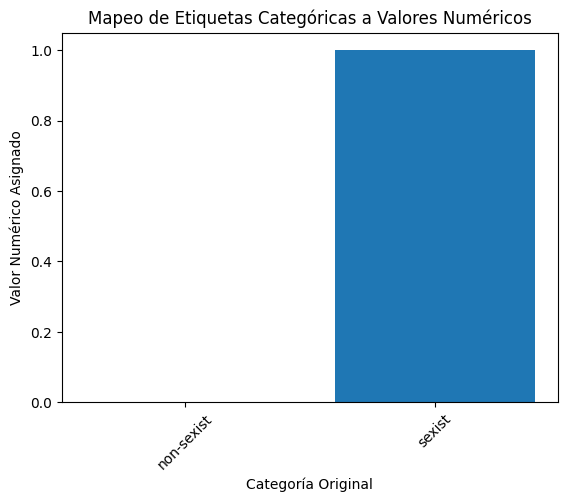

In [ ]:
import matplotlib.pyplot as plt

# Crear un diagrama de barras
plt.bar(label_mapping.keys(), label_mapping.values())
plt.xlabel('Categoría Original')
plt.ylabel('Valor Numérico Asignado')
plt.title('Mapeo de Etiquetas Categóricas a Valores Numéricos')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(train_data)
X_test_vectorized = vectorizer.transform(test_data)


<font color="brown"><h1>**Algoritmos**</h1></font>


1.   Entrenamiento.
2.   Predicción.
3.   Evaluación del modelo.



<font color="blue"><h1>**SVC**</h1></font>

1.   SVC con configuraciñon mínima.
2.   SVC con ajuste de parámetros. Objetivo mejorar el modelo anterior.



In [ ]:
# Ajuste mínimo
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_vectorized, Y_train_encoded)


SVC()

In [ ]:
y_pred = model.predict(X_test_vectorized)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_encoded, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1050
           1       0.75      0.64      0.69      1158

    accuracy                           0.70      2208
   macro avg       0.70      0.70      0.70      2208
weighted avg       0.71      0.70      0.70      2208



In [ ]:
# Ajustes de parámetros.
# Definir los parámetros a ajustar
model= SVC()
parameters = {'C': [0.1, 1, 10],
              'gamma': [0.1, 0.01, 0.001]}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train_vectorized, Y_train_encoded)

# Obtener la mejor configuración de parámetros encontrada
best_params = grid_search.best_params_
# Crear el modelo final con los mejores parámetros
final_model = SVC(**best_params)
final_model.fit(X_train_vectorized, Y_train_encoded)

SVC(C=10, gamma=0.1)

In [ ]:
from sklearn.metrics import accuracy_score

# Realizar la predicción en el conjunto de prueba
Y_pred = final_model.predict(X_test_vectorized)

# Calcular la precisión del modelo
accuracy = accuracy_score(Y_test_encoded, Y_pred)

# Imprimir la precisión del modelo
print("Precisión del modelo: {:.2f}".format(accuracy))

# Generar el informe de clasificación
classification_report = classification_report(Y_test_encoded, Y_pred)

# Imprimir el informe de clasificación
print("Informe de clasificación:\n", classification_report)


Precisión del modelo: 0.70
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68      1050
           1       0.71      0.70      0.71      1158

    accuracy                           0.70      2208
   macro avg       0.69      0.70      0.69      2208
weighted avg       0.70      0.70      0.70      2208



<font color="blue"><h1>**Random Forest**</h1></font>

1.   Rf con configuraciñon mínima.
2.   Rf con ajuste de parámetros. Objetivo mejorar el modelo anterior.

In [ ]:
# Rf con ajuste mínimo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier()

# Entrenar el modelo
rf_model.fit(X_train_vectorized, Y_train_encoded)

# Realizar predicciones en el conjunto de prueba
Y_pred_rf = rf_model.predict(X_test_vectorized)

# Evaluar el modelo
print(classification_report(Y_test_encoded, Y_pred_rf))


              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1050
           1       0.74      0.69      0.71      1158

    accuracy                           0.71      2208
   macro avg       0.71      0.71      0.71      2208
weighted avg       0.71      0.71      0.71      2208



In [ ]:
# Rf con ajuste de parámetros
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo Random Forest
model = RandomForestClassifier()

# Definir los parámetros a ajustar
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train_vectorized, Y_train_encoded)

# Obtener la mejor configuración de parámetros encontrada
best_params = grid_search.best_params_

# Crear el modelo final con los mejores parámetros
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_vectorized, Y_train_encoded)

# Realizar predicciones en el conjunto de prueba
Y_pred_rf = final_model.predict(X_test_vectorized)

# Evaluar el modelo
print(classification_report(Y_test_encoded, Y_pred_rf))


              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1050
           1       0.72      0.69      0.71      1158

    accuracy                           0.70      2208
   macro avg       0.70      0.70      0.70      2208
weighted avg       0.70      0.70      0.70      2208



In [ ]:
from sklearn.metrics import classification_report
Y_pred_rf = final_model.predict(X_test_vectorized)
print(classification_report(Y_test_encoded, Y_pred_rf))


              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1050
           1       0.72      0.69      0.71      1158

    accuracy                           0.70      2208
   macro avg       0.70      0.70      0.70      2208
weighted avg       0.70      0.70      0.70      2208



<font color="blue"><h1>**Naive Bayes**</h1></font>

1.   Nb con configuraciñon mínima.
2.   Nb con ajuste de parámetros. Objetivo mejorar el modelo anterior.

In [ ]:
# Nb con ajuste mínimo.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Crear el modelo de Multinomial Naive Bayes
nb_model = MultinomialNB()

# Entrenar el modelo
nb_model.fit(X_train_vectorized, Y_train_encoded)

# Realizar predicciones en el conjunto de prueba
Y_pred_nb = nb_model.predict(X_test_vectorized)

# Evaluar el modelo
print(classification_report(Y_test_encoded, Y_pred_nb))


              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1050
           1       0.71      0.61      0.66      1158

    accuracy                           0.66      2208
   macro avg       0.67      0.67      0.66      2208
weighted avg       0.67      0.66      0.66      2208



In [ ]:
# NB con ajustes de parámetros
# Definir los parámetros a ajustar
from sklearn.model_selection import GridSearchCV
# Crear el modelo MultinomialNB
model = MultinomialNB()

parameters = {'alpha': [0.1, 0.5, 1.0]}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train_vectorized, Y_train_encoded)

# Obtener la mejor configuración de parámetros encontrada
best_params = grid_search.best_params_

# Crear el modelo final con los mejores parámetros
final_model = MultinomialNB(**best_params)
final_model.fit(X_train_vectorized, Y_train_encoded)
# Realizar predicciones en el conjunto de prueba
Y_pred_nb = final_model.predict(X_test_vectorized)

# Evaluar el modelo
print(classification_report(Y_test_encoded, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1050
           1       0.71      0.61      0.66      1158

    accuracy                           0.66      2208
   macro avg       0.67      0.67      0.66      2208
weighted avg       0.67      0.66      0.66      2208



<font color="blue"><h1>**XGBoost**</h1></font>

1.   Xg con configuraciñon mínima.
2.   Xg con ajuste de parámetros. Objetivo mejorar el modelo anterior.

In [ ]:
#XGBoost con ajuste mínimo

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Crear el modelo de XGBoost
xgb_model = XGBClassifier()

# Entrenar el modelo
xgb_model.fit(X_train_vectorized, Y_train_encoded)

# Realizar predicciones en el conjunto de prueba
Y_pred_xgb = xgb_model.predict(X_test_vectorized)

# Evaluar el modelo
print(classification_report(Y_test_encoded, Y_pred_xgb))


              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1050
           1       0.73      0.68      0.71      1158

    accuracy                           0.70      2208
   macro avg       0.70      0.70      0.70      2208
weighted avg       0.70      0.70      0.70      2208



In [ ]:
# XGBoost con ajustes de parámetros

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Crear el modelo XGBoost
model = XGBClassifier()

# Definir los parámetros a ajustar
parameters = {'learning_rate': [0.001],
              'max_depth': [3],
              'n_estimators': [500]}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train_vectorized, Y_train_encoded)

# Obtener la mejor configuración de parámetros encontrada
best_params = grid_search.best_params_

# Crear el modelo final con los mejores parámetros
final_model = XGBClassifier(**best_params)
final_model.fit(X_train_vectorized, Y_train_encoded)

# Realizar predicciones en el conjunto de prueba
Y_pred_xgb = final_model.predict(X_test_vectorized)

# Evaluar el modelo
print(classification_report(Y_test_encoded, Y_pred_xgb))


              precision    recall  f1-score   support

           0       0.56      0.80      0.66      1050
           1       0.70      0.42      0.53      1158

    accuracy                           0.60      2208
   macro avg       0.63      0.61      0.59      2208
weighted avg       0.63      0.60      0.59      2208



<font color="blue"><h1>**Conclusiones**</h1></font>

Hay que tener en cuenta que la clase objetivo no está equilibrada, dando lugar a un conjunto de datos desequilibrado.

Según los resultados se puede determinar que ***XGBoost*** es el modelo que muestra un desempeño generalmente mejor en términos de precisión, recall y f1-score.

Para intentar mejorar los modelos iniciales se ha optado por ajustar los hiperparámetros.


1.   SVC : se ha conseguido mejorar ligeramente el modelo.
2.   RF : se consigue una mejora muy leve.
3.   NB : hay mejora pero los scores conseguidos son justos.
4.   XGBoost : en este caso con diferentes configuraciones de los parámetros no mejora el resultado anterior.





Consideraciones:  

.- Manejar la jerga de tweeter.

.- Utilizar webembeddings.

https://medium.com/@gourav.didwania/step-1-a-comprehensive-guide-to-text-cleaning-36ae5077f15